In [14]:
import numpy as np 
import matplotlib.pyplot as plot 
import scipy.optimize as opt

In [15]:
def get_voltages():
    voltage = np.array([4.9, 4.5, 4.0, 3.5, 3.0, 2.5, 2.0, 1.5, 1.0, 0.5, 0.4, 0.3, 0.2, 0.1, 0])
    scan_range = np.array([45.6, 42.8, 38.3, 34.2, 31.0, 25.2, 20.2, 16.0, 10.8, 5.90, 5.04, 3.97, 2.7, 1.4, 0])
    return(voltage, scan_range)

In [16]:
def plot_scatter(volatge, scan_range):
    fig, ax = plot.subplots()
    plot.rcParams.update({'font.size' : 16})
    plot.rcParams.update({'figure.figsize' :[12, 8]})
    plot.scatter(voltage, scan_range, marker = 'x', label = 'Data points',
                linewidth = '2', color ='k')
    plot.xlabel('Applied Voltage (V)')
    plot.ylabel(r'Scan range ($\mu$m)')
    
    return(fig, ax)

In [17]:
def linear_fit(x, m, c):
    y = m*x + c
    return(y)

In [32]:
def linear_fitting_plot(x,y, ax1, r_squared):
    ax1.plot(x,y, label='Straight line fit \nR squared = ' + str(np.round(r_squared,3)), color='r', linewidth = '2')
    ax1.legend()
    return(ax1)

In [27]:
def straight_line_fit(voltage, scan_range):
    
    init_params = [1, 6.0]
    opt_cf_params, opt_confidence = opt.curve_fit(linear_fit, 
                                                 voltage, scan_range, 
                                                  init_params)
    
    cf_errors = np.sqrt(np.diag(opt_confidence))
    x = voltage
    y = linear_fit(x, opt_cf_params[0], opt_cf_params[1])
    
    return(opt_cf_params, cf_errors, x, y)

In [26]:
def get_r_squared(x, y_data, y_fitting):
    # This is a function used to generate the goodness of fit metric r^2.
    # This value will be used to judge the effectiveness of the curve fitting 
    # used to find the resonant frequencies of the NV centre.
    
    y_data_mean = np.mean(y_data)
    SStot = np.sum((y_data - y_data_mean)**2) # Find the variation in experimental y values.
    SSres = np.sum((y_data - y_fitting)**2) # Find the variation betweem the experimental and fitted y values. 
    
    r_squared = 1 - (SSres/SStot) # Calculate R^2
    
    return(r_squared)

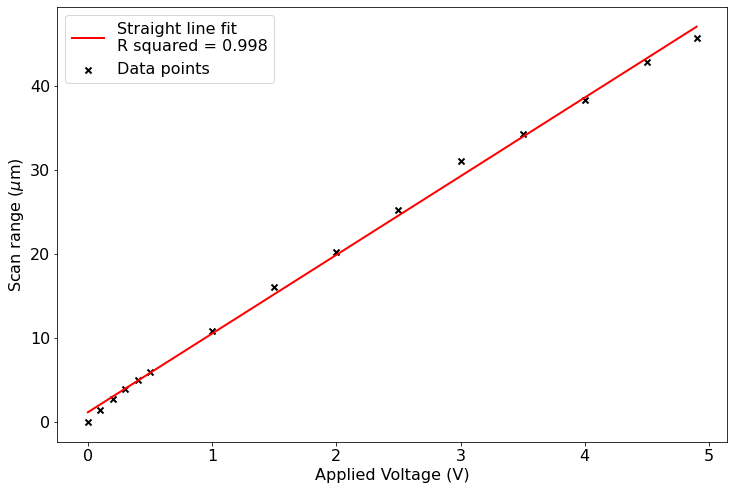

In [37]:
voltage, scan_range = get_voltages()
fig, ax = plot_scatter(voltage, scan_range)
opt_cf_params, cf_errors, x, y = straight_line_fit(voltage, scan_range)
r_squared = get_r_squared(x,scan_range, y)
ax = linear_fitting_plot(x, y, ax, r_squared)
plot.savefig('C:\\Users\\Ryan\\Desktop\\res_scanner.png')

In [30]:
print(opt_cf_params)
print(cf_errors)

[9.2087361  4.78390278]
[0.15729206 0.12750778]


In [24]:
print(voltage[0])

4.9


NameError: name 'ax1' is not defined